In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
import numpy as np
import pandas as pd #판다스 임포트
#데이터 경로
data_path='/kaggle/input/bike-sharing-demand/'
train=pd.read_csv(data_path+'train.csv') #훈련 데이터
test=pd.read_csv(data_path+'test.csv') #테스트 데이터
submission=pd.read_csv(data_path+'sampleSubmission.csv') #제출 샘플 데이터

In [3]:
train.shape,test.shape #shape()함수로 훈련/테스트 데이터의 크기 확인

((10886, 12), (6493, 9))

In [4]:
train.head() #각 데이터들이 어떤 피처 데이터를 가지고 있는지 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head() #casual과 registered가 빠

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
submission.head() #제출 샘플 파일의 형태를 알아보자! datetime은 데이터를 구분하는 역할만 하므로 타깃값을 예측하는데 도움이 안됨. 모델 훈련시 datetime 피처는 제거.

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [7]:
train.info() #info() 함수 사용시 각 열의 결측값, 데이터 타입을 알 수 있다. 결측값이 있다면 적절한 처리 필요!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [9]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#mpl이 그린 그래프를 주피터 노트북에서 바로 출력해주는 코드

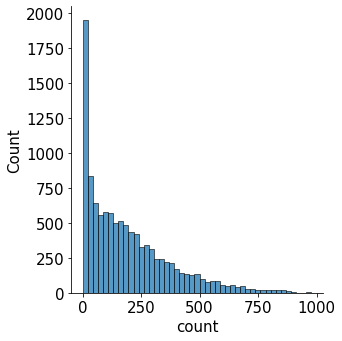

In [10]:
mpl.rc('font',size=15)
sns.displot(train['count']);

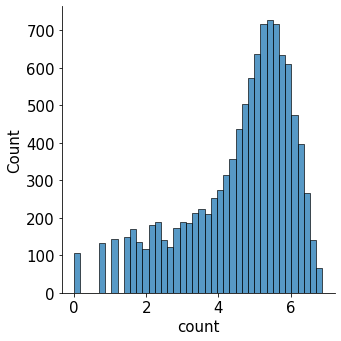

In [11]:
sns.displot(np.log(train['count'])); 
#데이터가 좌편향시 로그변환 사용: 정규분포화

In [12]:
train=train[train['weather']!=4]

In [13]:
import pandas as pd
data_path='/kaggle/input/bike-sharing-demand/'
train=pd.read_csv(data_path+'train.csv')
test=pd.read_csv(data_path+'test.csv')
submission=pd.read_csv(data_path+'sampleSubmission.csv')

In [14]:
train=train[train['weather']!=4] #이상치 제거 weather4(폭우, 폭설)

In [15]:
all_data=pd.concat([train,test],ignore_index=True)
all_data
#테스트 데이터에 casual, registered 피처와 count 타깃값이 없어서 not a number로 표시

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [16]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
# 대여 수량을 예측할 때 일(day) 피처는 사용할 필요가 없음
# minute, second 피처도 모든 기록에서 값이 같으므로 예측에 사용할 필요가 없음


In [17]:
drop_features=['casual','registered','datetime','date','windspeed','month']
all_data=all_data.drop(drop_features,axis=1)
# c와 r은 테스트 데이터에 없으므로 제거
# d1 피처는 인덱스 역할, d2 피처가 갖는 정보는 다른 피처들에도 담겨 있어서 제게
# season 피처가 month의 대분류라 month 피처도 제거
# windspeed 피처도 타깃값과 상관관계가 약해서 제거

In [18]:
X_train=all_data[~pd.isnull(all_data['count'])]
X_test=all_data[pd.isnull(all_data['count'])]     
# 훈련 데이터와 테스트 데이터 분리

X_train=X_train.drop(['count'],axis=1)
X_test=X_test.drop(['count'],axis=1)
# 타깃값 count 제거

y=train['count']
# 타깃

In [19]:
X_train.head()
# 피처 엔지니어링 후 훈련 데이터 구성 확인!
# datetime, windspeed, casual, registered, count 빠짐
# year, hour, weekday 추가됨

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


In [20]:
import numpy as np

def rmsle(y_true,y_pred,convertExp=True):
    if convertExp:
        y_true=np.exp(y_true)
        y_pred=np.exp(y_pred)
        # 지수 변환
    log_true=np.nan_to_num(np.log(y_true+1))
    log_pred=np.nan_to_num(np.log(y_pred+1))
    # 로그변환 후 결측값을 0으로 변환
    output=np.sqrt(np.mean((log_true-log_pred)**2))
    return output
    # RSMLE 계산: 공식을 넘파이로 그대로 구현한 코드, RSMLE 수치를 최종적으로 계산해 

In [21]:
from sklearn.linear_model import LinearRegression
linear_reg_model=LinearRegression()

In [22]:
log_y=np.log(y)
# 타깃값 로그변환
linear_reg_model.fit(X_train,log_y)
# 모델 훈련

LinearRegression()

In [23]:
preds=linear_reg_model.predict(X_train)
# 모델 성능 검증을 위해 예측을 수행하는 코드
# 훈련된 선형 회귀 모델이 X_train 피처를 기반으로 타깃값을 예측

In [24]:
print(f'선형 회귀의 RMSLE 값: {rmsle(log_y,preds,True):.4f}')
# 예측 결과로부터 훈련이 얼마나 잘 되었는지를 평가
# log_y와 preds 사이의 RMSLE 값 구하기
# RMSLE 계산 전 지수변환 해줌
# 소수점 넷째 자리까지 구하라는 명령

선형 회귀의 RMSLE 값: 1.0205


In [25]:
linearreg_preds=linear_reg_model.predict(X_test)
# 테스트 데이터로 예측
submission['count']=np.exp(linearreg_preds)
# 지수변환
submission.to_csv('submission.csv', index=False)
# 파일로 저장
# dataframe를 csv 파일로 저장하는 함수
# index=False로 설정해야 dataframe 인덱스를 제외하고 저장

In [26]:
import pandas as pd
submission=pd.read_csv('/kaggle/working/submission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,11.362398
1,2011-01-20 01:00:00,13.601789
2,2011-01-20 02:00:00,15.084417
3,2011-01-20 03:00:00,16.308758
4,2011-01-20 04:00:00,18.086453
...,...,...
6488,2012-12-31 19:00:00,114.076538
6489,2012-12-31 20:00:00,126.511160
6490,2012-12-31 21:00:00,140.114463
6491,2012-12-31 22:00:00,169.345347


In [27]:
submission.to_csv('submission.csv',index=False)